<a href="https://colab.research.google.com/github/pzoliveira/IGTI_PG/blob/main/IGTI_RegrLin_colesterol_peso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as Bibliotecas a serem utilizadas

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sbn

## Carregando o dataframe com os dados dos clientes (inclusive colesterol e peso)

In [9]:
df = pd.read_csv("dados_clinicos.csv", ";")
df.isnull().sum()

<ipython-input-9-6b4bbfd55b0b>:1: FutureWarning:

In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.



id_cliente    0
peso          5
colesterol    0
genero        0
dtype: int64

## Pela análise, temos NaN na coluna 'peso'

In [7]:
df['peso'].mean()

143.15898305084747

## Vamos substituir os valores NaN pela média com duas casas decimais
## e eliminar possíveis linhas duplicadas

In [27]:
df['peso'] = df['peso'].fillna(np.round_(df['peso'].mean(), decimals=2))
df.drop_duplicates()
df

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino
...,...,...,...,...
585,363,172.0,211,Masculino
586,364,157.0,194,Feminino
587,365,137.0,169,Feminino
588,366,158.0,189,Feminino


In [23]:
df['peso'].dtype

dtype('float64')

In [24]:
df['colesterol'].dtype

dtype('int64')

## Criando as variáveis independente e dependente

In [28]:
X_peso = df.iloc[: , 1].values
y_colesterol = df.iloc[: , 2].values

In [22]:
X_peso

array([102., 115., 115., 140., 130., 198., 114., 145., 191., 186., 104.,
       188.,  96., 156., 125., 178., 109., 168., 152., 133., 153., 107.,
       199., 140.,  95., 183., 108., 190., 174., 149., 169., 138., 151.,
       109., 178., 106., 195.,  96., 129., 166., 197., 148., 117., 193.,
       170., 130., 183., 134., 128., 105., 115., 166., 183., 149., 110.,
       164., 157., 170., 124., 145., 113., 150., 100.,  nan, 139., 150.,
       101., 157., 187., 137., 121., 132., 130., 156., 180., 100., 122.,
       185., 113., 123., 119., 113., 168., 126., 102., 116., 144., 140.,
       124., 108., 154., 185., 106.,  97.,  96., 129., 124., 149.,  97.,
       102., 146.,  nan, 100., 118., 179., 179., 113., 142., 101., 174.,
       131., 179., 122., 105., 176., 103., 120., 118., 143., 134., 203.,
       116., 150., 192., 187., 107., 192.,  97., 157., 128., 183., 112.,
       173., 156., 137., 156., 112., 203., 141.,  97., 186., 113., 195.,
       175., 154., 173.,  nan, 152., 114., 181., 11

In [18]:
y_colesterol

array([111, 135, 136, 167, 158, 227, 131, 176, 223, 221, 116, 222, 102,
       192, 152, 213, 125, 204, 189, 163, 189, 122, 228, 168, 102, 218,
       123, 222, 208, 183, 204, 167, 188, 126, 213, 122, 225, 105, 155,
       203, 225, 177, 139, 224, 207, 158, 218, 164, 154, 118, 138, 199,
       219, 183, 128, 197, 196, 208, 152, 175, 129, 185, 107, 211, 167,
       185, 110, 194, 221, 166, 143, 163, 158, 191, 216, 106, 146, 220,
       131, 147, 141, 130, 204, 152, 111, 139, 172, 168, 148, 123, 189,
       220, 120, 106, 105, 157, 149, 185, 106, 115, 177, 230, 108, 140,
       214, 216, 130, 169, 110, 209, 162, 214, 145, 116, 209, 116, 139,
       143, 168, 158, 232, 136, 180, 228, 222, 117, 224, 104, 195, 156,
       213, 133, 208, 195, 163, 195, 124, 231, 172, 104, 221, 128, 222,
       214, 184, 204, 171, 195, 132, 214, 123, 233, 107, 162, 204, 227,
       185, 142, 225, 212, 161, 220, 168, 155, 125, 144, 201, 222, 189,
       132, 204, 201, 211, 156, 179, 129, 185, 107, 213, 172, 19

In [29]:
np.corrcoef(X_peso , y_colesterol)

array([[1.        , 0.98541832],
       [0.98541832, 1.        ]])

## Plot da matriz de correlação

<ipython-input-33-dca5d04d2887>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

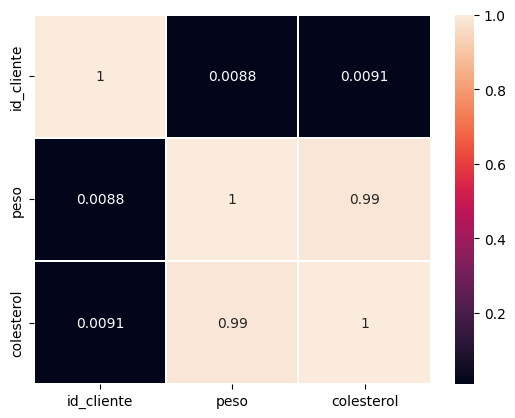

In [33]:
correlation = df.corr()
plot = sbn.heatmap(correlation, annot = True,  linewidths=.3)
plot

In [67]:
X_peso = X_peso.reshape(-1,1)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
prev_colesterol = LinearRegression()

In [72]:
prev_colesterol.predict([[95]])

array([109.46299311])

In [73]:
df[df['peso'] == 95].values

array([[25, 95.0, 102, 'Masculino']], dtype=object)

In [74]:
prev_colesterol.predict([[220]])

array([266.76698828])

In [37]:
type(prev_colesterol)

sklearn.linear_model._base.LinearRegression

In [38]:
prev_colesterol.fit(X_peso , y_colesterol)

LinearRegression()

In [45]:
previsoes_colesterol = prev_colesterol.predict(X_peso)

In [46]:
X_peso = X_peso.ravel()

In [57]:
genre = df.iloc[: , 3].values
genre.dtype

dtype('O')

In [59]:
grafico = px.scatter(x = X_peso, y = y_colesterol)
grafico.add_scatter(x = X_peso , y = previsoes_colesterol, name= 'previsões')
grafico.show()

In [49]:
prev_colesterol.coef_

array([1.25843196])

In [50]:
prev_colesterol.intercept_

-10.088043210138068

In [63]:
df_fem = df[df['genero'] == 'Feminino']

,id_cliente,peso,colesterol,genero
0,1,102.0,111,Masculino
1,2,115.0,135,Masculino
2,3,115.0,136,Masculino
3,4,140.0,167,Feminino
4,5,130.0,158,Masculino
...,...,...,...,...
585,363,172.0,211,Masculino
586,364,157.0,194,Feminino
587,365,137.0,169,Feminino
588,366,158.0,189,Feminino


In [64]:
Xf = df_fem.iloc[: , 1].values
yf = df_fem.iloc[: , 2].values

In [65]:
grafico = px.scatter(x = Xf, y = yf)
grafico.show()

In [75]:
prev_colesterol.score(X_peso , y_colesterol)

0.9710492593823397

In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_colesterol , previsoes_colesterol)

4.9787994101408914